In [ ]:
# This is included for documentation purpose, not a part of this tutorial
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# A Point in e Frame

Let's simulate below 3D plot displaying the origin, point P, their projections on axes, line vectors, and an orthonormal frame in different colors and styles.

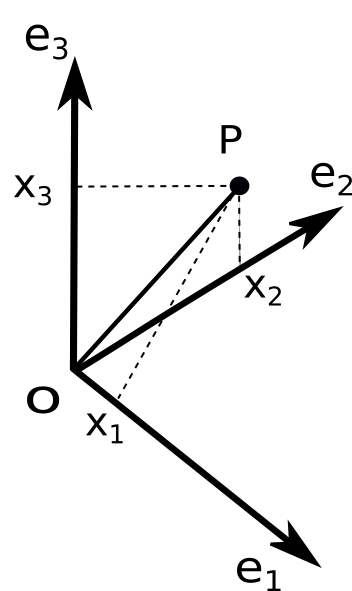

## Prerequisites

Import following libraries on your notebook

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
def create_line_trace(start, end, color='blue', width=2, name='', dash='solid', showlegend=False):
    line_trace = go.Scatter3d(
        x=[start[0], end[0]],
        y=[start[1], end[1]],
        z=[start[2], end[2]],
        mode='lines',
        line=dict(color=color, width=width, dash=dash),
        name=name,
        showlegend=showlegend
    )
    return line_trace

def create_point_trace(point, color='red', size=5, name=''):
    x, y, z = point
    trace = go.Scatter3d(
        x=[x], y=[y], z=[z],
        mode='markers+text',
        marker=dict(color=color, size=size),
        text=[name],
        textposition="top center",
        showlegend=False
    )
    return trace

def create_arrow_trace(start, end, color='blue', name='', showlegend=False):
    # Create arrow shaft trace
    shaft_trace = go.Scatter3d(
        x=[start[0], end[0]], y=[start[1], end[1]], z=[start[2], end[2]],
        mode='lines',
        line=dict(color=color, width=5),
        name=name,
        showlegend=showlegend
    )

    # Create arrowhead trace
    vec = np.array(end) - np.array(start)
    length = np.linalg.norm(vec)
    vec_normalized = vec / length if length > 0 else vec
    arrowhead_size = 0.1 * length

    head_trace = go.Cone(
        x=[end[0]], y=[end[1]], z=[end[2]],
        u=[vec_normalized[0]], v=[vec_normalized[1]], w=[vec_normalized[2]],
        sizemode="absolute", sizeref=arrowhead_size, showscale=False,
        anchor="tip", colorscale=[[0, color], [1, color]]
    )

    return [shaft_trace, head_trace]

def create_3d_layout(title='3D Plot', gridcolor='lightblue', xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'):
    layout = go.Layout(
        title=title,
        scene=dict(
            xaxis=dict(showbackground=False, showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='rgba(0,0,0,0.5)', showticklabels=True, gridcolor=gridcolor, title=xaxis_title),
            yaxis=dict(showbackground=False, showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='rgba(0,0,0,0.5)', showticklabels=True, gridcolor=gridcolor, title=yaxis_title),
            zaxis=dict(showbackground=False, showgrid=True, zeroline=True, zerolinewidth=2, zerolinecolor='rgba(0,0,0,0.5)', showticklabels=True, gridcolor=gridcolor, title=zaxis_title),
        ),
        scene_aspectmode='cube'
    )
    return layout

def create_orthonormal_frame_traces(frame_name='e', origin=[0, 0, 0], length=1, color='blue', rotation_matrix=np.identity(3)):
    # Define standard basis vectors
    i = np.array([1, 0, 0])
    j = np.array([0, 1, 0])
    k = np.array([0, 0, 1])

    # Apply rotation
    i_rot = np.dot(rotation_matrix, i)
    j_rot = np.dot(rotation_matrix, j)
    k_rot = np.dot(rotation_matrix, k)

    # Create traces for rotated axes with arrows
    frame_traces = []
    frame_traces.extend(create_arrow_trace(start=origin, end=np.array(origin) + length * i_rot, color=color, name=f'{frame_name}_x'))
    frame_traces.extend(create_arrow_trace(start=origin, end=np.array(origin) + length * j_rot, color=color, name=f'{frame_name}_y'))
    frame_traces.extend(create_arrow_trace(start=origin, end=np.array(origin) + length * k_rot, color=color, name=f'{frame_name}_z'))

    return frame_traces

def animate_particle(curve_points, particle_name='Particle', particle_color='red', particle_size=6, animation_speed=10):
    # Creating frames for animation
    frames = []
    for i in range(0, len(curve_points), animation_speed):
        frame = go.Frame(data=[go.Scatter3d(
            x=[curve_points[i][0]],
            y=[curve_points[i][1]],
            z=[curve_points[i][2]],
            mode='markers+text',
            marker=dict(color=particle_color, size=particle_size),
            text=[particle_name],
            textposition='top center',
            textfont=dict(size=15)
        )])
        frames.append(frame)

    return frames

def create_particle_animation(curve_points, title='Particle Animation', name='P', origin=[0, 0, 0]):

    # Validate curve_points
    if not isinstance(curve_points, np.ndarray):
        raise ValueError("curve_points must be a NumPy array.")
    if curve_points.size == 0 or curve_points.ndim != 2 or curve_points.shape[1] != 3:
        raise ValueError("curve_points must be a non-empty 2D NumPy array with 3 columns (x, y, z coordinates).")

    traces = []
    frames = []

    x_vals, y_vals, z_vals = zip(*curve_points)

    # Add initial point and origin 'O'
    traces.append(create_point_trace(curve_points[0], color='green', size=8, name=name))
    traces.append(create_point_trace(origin, color='black', size=3, name='O'))

    # Set layout for the figure
    layout = create_3d_layout(title=title, xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis')

    # Add path trace
    traces.append(go.Scatter3d(
        x=x_vals, y=y_vals, z=z_vals,
        mode="lines",
        line=dict(color="blue", width=2),
        name='Path'
    ))

    # Animate the particle
    frames = animate_particle(curve_points, name, particle_color='green', particle_size=8, animation_speed=1)

    fig = go.Figure(data=traces, layout=layout, frames=frames)

    # Adjust the camera settings
    fig.update_layout(
        scene=dict(
            camera=dict(
                up=dict(x=0, y=0, z=1),  # Sets the up direction (in this case, the z-axis is up)
                center=dict(x=0, y=0, z=0),  # Centers the view on the given coordinates
                eye=dict(x=1, y=-1.25, z=1.25)  # Sets the position of the camera
            ),
            aspectmode='cube'  # Keeps the aspect ratio of the axes fixed
        )
    )

    # Add play and pause buttons
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                buttons=[
                    dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)]),
                    dict(label="Pause",
                          method="animate",
                          args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate")])
                ]
            )
        ]
    )

    return fig

<div class="alert alert-info">

Note

The functions `create_line_trace`, `create_point_trace`, `create_arrow_trace`, and and others were written in previous tutorials. Please include them in your notebook on top before starting to follow this tutorial. You can download it by clicking the Download icon on the Navigation Bar.

</div>

## Steps

### Step 1: Define the Origin and Point P

Here, we define the coordinates of the origin ($O$) as $[0, 0, 0]$ and the coordinates of point $P$ as $[2, 3, 4]$.

In [ ]:
origin = [0, 0, 0]
point_p = [2, 3, 4]

### Step 2: Create Traces for Points

We create traces for the origin ($O$) and point $P$ using the `create_point_trace` function, specifying their colors, sizes, and names.

In [ ]:
traces = []
traces.append(create_point_trace(origin, color='black', size=3, name='O'))
traces.append(create_point_trace(point_p, color='green', size=3, name='P'))

### Step 3: Create Traces for Point Projections on Axes

We create traces for the projections of point P onto the coordinate axes $(x_1, x_2, x_3)$ using the `create_point_trace` function.

In [ ]:
traces.append(create_point_trace([point_p[0], 0, 0], color='green', size=3, name='x1'))
traces.append(create_point_trace([0, point_p[1], 0], color='green', size=3, name='x2'))
traces.append(create_point_trace([0, 0, point_p[2]], color='green', size=3, name='x3'))

### Step 4: Create Line Traces

We create line traces to represent the vectors $OP$, $P$ to $e_1$, $P$ to $e_2$, and $P$ to $e_3$ using the `create_line_trace` function.

In [ ]:
traces.append(create_line_trace(origin, point_p, color='blue', name='OP'))
traces.append(create_line_trace(point_p, [point_p[0], 0, 0], color='blue', width=2, dash='dash', name='P to e1'))
traces.append(create_line_trace(point_p, [0, point_p[1], 0], color='blue', width=2, dash='dash', name='P to e2'))
traces.append(create_line_trace(point_p, [0, 0, point_p[2]], color='blue', width=2, dash='dash', name='P to e3'))

### Step 5: Create Orthonormal Frame Traces

We create traces for the orthonormal frame $(e)$ using the `create_orthonormal_frame_traces` function and extend the traces list with these frame traces.

In [ ]:
frame_traces = create_orthonormal_frame_traces(frame_name='e', origin=origin, length=5, color='red')
traces.extend(frame_traces)

### Step 6: Set Layout and Create the Figure

We set the layout using the `create_3d_layout` function, specifying the title and axis titles. Then, we create a Plotly figure (`fig`) with the defined traces and layout.

In [ ]:
layout = create_3d_layout(title='Point P in 3D Inertial Frame e', xaxis_title='e1 Axis', yaxis_title='e2 Axis', zaxis_title='e3 Axis')
fig = go.Figure(data=traces, layout=layout)
fig.show()